In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
magic_gamma_telescope = fetch_ucirepo(id=159) 
  
# data (as pandas dataframes) 
X = magic_gamma_telescope.data.features 
y = magic_gamma_telescope.data.targets 
  
# metadata 
print(magic_gamma_telescope.metadata) 
  
# variable information 
print(magic_gamma_telescope.variables) 


{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.concat([X,y],axis=1)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [8]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [9]:
df['class'] = (df['class'] == 'g').astype(int)

In [10]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


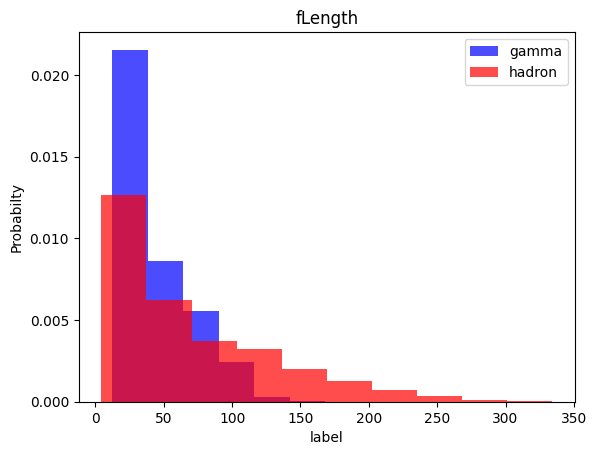

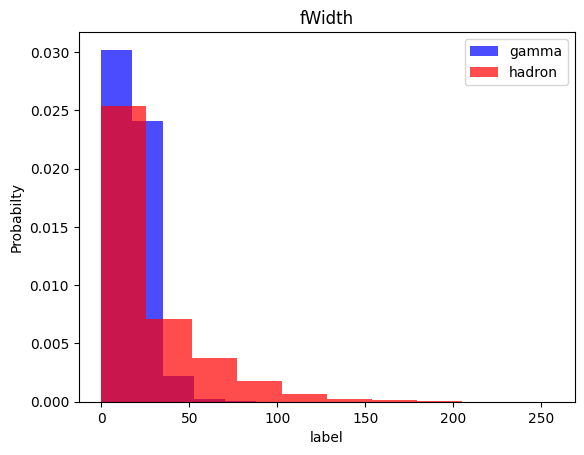

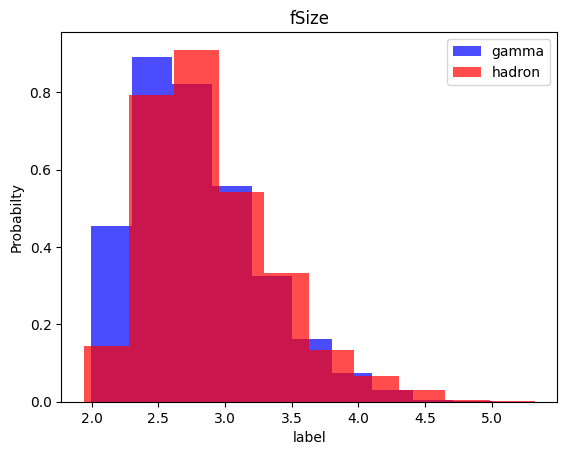

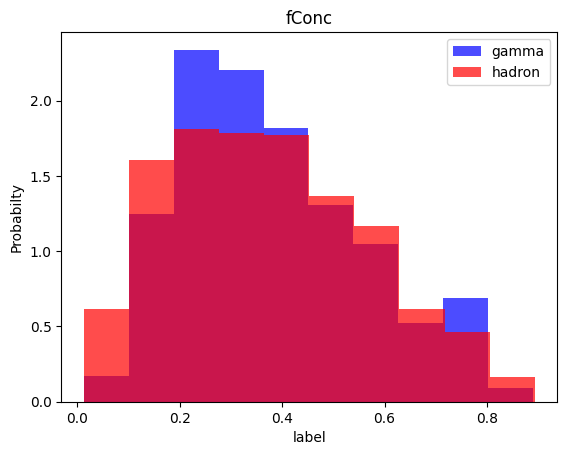

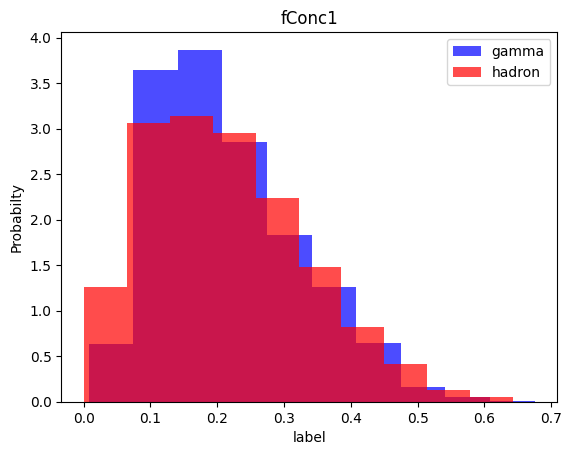

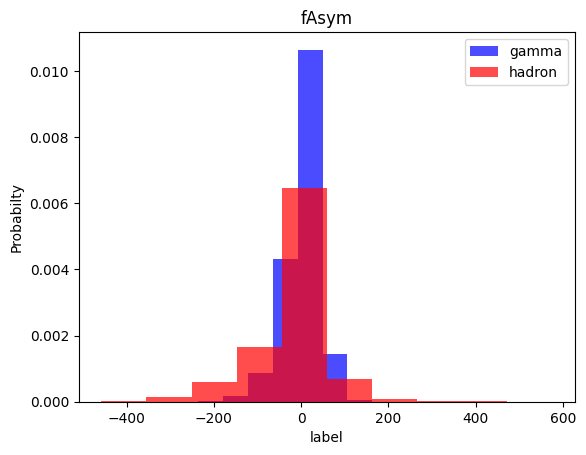

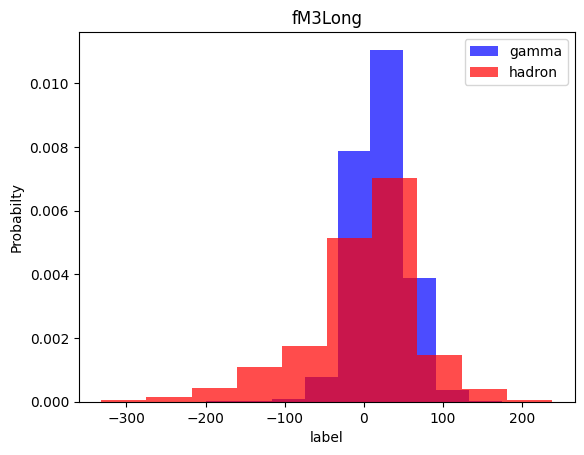

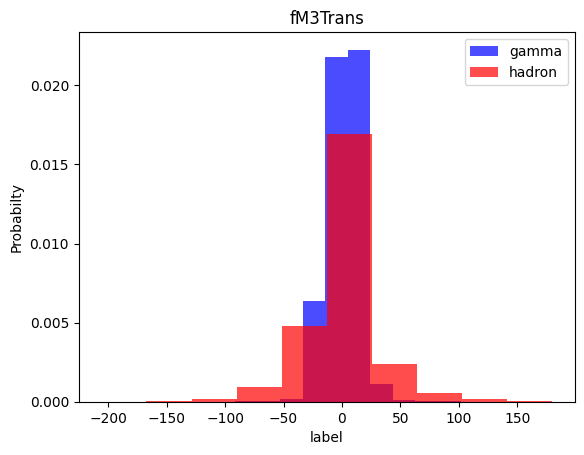

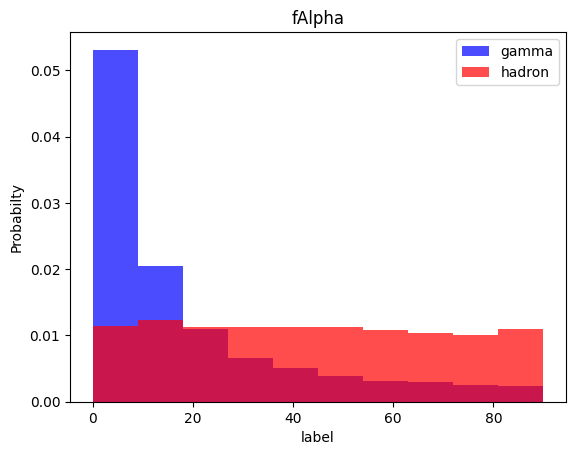

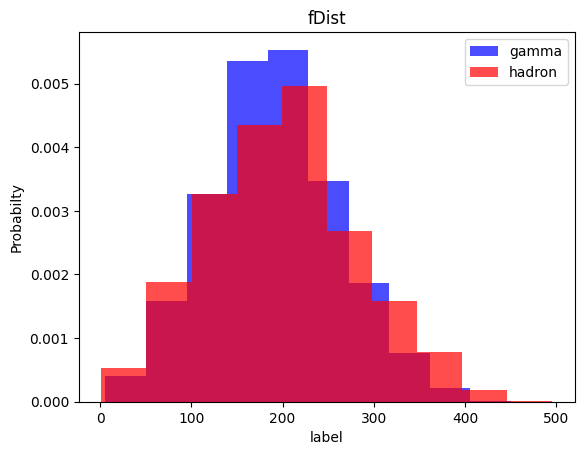

In [11]:
cols = df.columns[:-1]
for label in cols:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel('Probabilty')
  plt.xlabel('label')
  plt.legend()
  plt.show()

In [12]:
train,valid,test =np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

c:\Users\ENVY\OneDrive\Desktop\Documents\Magic_Gamma_Telescope\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
#as hadron are less in number 
from imblearn.over_sampling import RandomOverSampler

In [14]:
print(type(train))
print(type(valid))
print(type(test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [15]:
train = pd.DataFrame(train)
valid = pd.DataFrame(valid)
test = pd.DataFrame(test)

In [16]:


def scale_dataset(dataframe, oversample=False):
    # Extract features (X) and target (y)
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Oversample only if required
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    # Combine scaled features and labels
    data = np.hstack((X, np.reshape(y,(-1, 1))))

    return data, X, y


In [17]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)


In [18]:
sum(y_train ==0)

np.int64(7380)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
y_pred = knn_model.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1338
           1       0.86      0.87      0.86      2466

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.82      0.82      3804



In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [25]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52      1338
           1       0.74      0.89      0.81      2466

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logreg_model = LogisticRegression()
logreg_model = logreg_model.fit(X_train,y_train)

In [28]:
y_pred =logreg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1338
           1       0.85      0.82      0.83      2466

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804

